## 타이타닉 생존자 예측

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
tt_df = pd.read_csv("../data/titanic_train.csv")
tt_df.head(3)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
tt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 탑승자 데이터
* Passengerid : 탑승자 데이터 일련번호
* Survived : 생존 여부, 0 = 사망, 1 = 생존
* Pclass : 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* Gender : 탑승자 성별
* Name : 탑승자 이름
* Age : 탑승자 나이
* Sibsp : 같이 탑승한 형제자매 또는 배우자 인원수
* Parch : 같이 탑승한 부모님 또는 어린이 인원수
* Ticket : 티켓 번호
* Fare : 요금
* Cabin : 선실 번호
* Embarked : 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
# DataFrame 숫자형 데이터에 대한 통계 요약
# tt_df.describe()
tt_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#### Null 값 처리

In [5]:
tt_df["Age"] = tt_df["Age"].fillna(tt_df["Age"].mean()) # Age 컬럼의 null은 평균 Age로 채움
tt_df["Cabin"] = tt_df["Cabin"].fillna("N")
tt_df["Embarked"] = tt_df["Embarked"].fillna("N")

# 전체 DataFrame의 Null 갯수
print(f"데이터 세트 Null 값 갯수 : {tt_df.isnull().sum().sum()}")

데이터 세트 Null 값 갯수 : 0


#### 주요 컬럼 EDA

In [6]:
# object 타입 컬럼 추출
tt_df.dtypes[tt_df.dtypes == "object"].index.tolist()

['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked']

In [7]:
print(f"Gender 값 분포 : {tt_df['Gender'].value_counts()}")
print(f"Cabin 값 분포 : {tt_df['Cabin'].value_counts()}")
print(f"Embarked 값 분포 : {tt_df['Embarked'].value_counts()}")

Gender 값 분포 : Gender
male      577
female    314
Name: count, dtype: int64
Cabin 값 분포 : Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64
Embarked 값 분포 : Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [8]:
tt_df["Cabin"].str[:1]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [9]:
tt_df["Cabin"] = tt_df["Cabin"].str[:1]
tt_df["Cabin"].head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

In [10]:
# 성별, 생존여부 그룹화
tt_df.groupby(["Gender", "Survived"])

In [11]:
# 성별, 생존자 그룹화 하여 카운트
tt_df.groupby(["Gender", "Survived"])["Survived"].count()

Gender  Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [12]:
tt_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='Survived'>

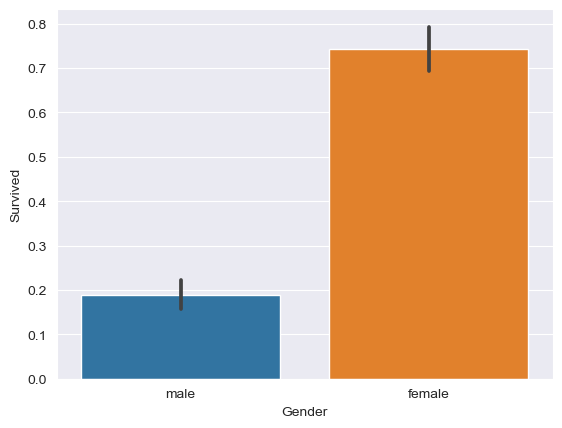

In [13]:
sns.barplot(x = "Gender", y = "Survived", data = tt_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

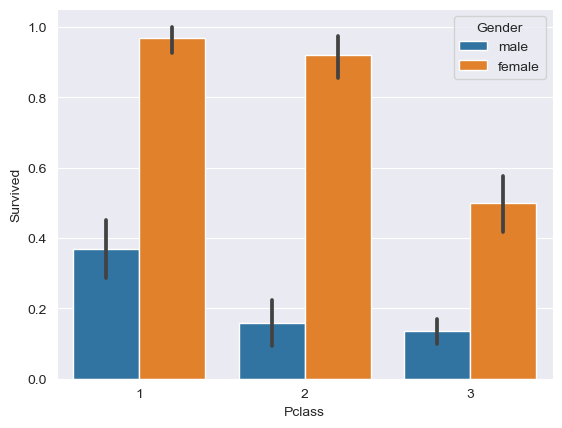

In [14]:
sns.barplot(x = "Pclass", y = "Survived", hue = "Gender", data = tt_df)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C


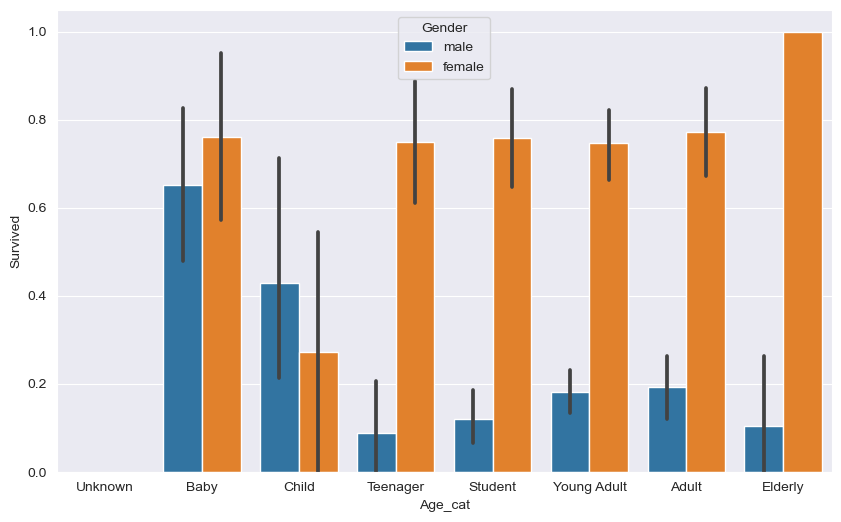

In [15]:
# age를 카테고리화 하여 반환하는 함수 설정
# DataFrame의 apply lambda 식에 사용
def get_category(age) :
    cat = ""
    if age <= -1 : cat = "Unknown"
    elif age <= 5 : cat = "Baby"
    elif age <= 12 : cat = "Child"
    elif age <= 18 : cat = "Teenager"
    elif age <= 25 : cat = "Student"
    elif age <= 35 : cat = "Young Adult"
    elif age <= 60 : cat = "Adult"
    else : cat = "Elderly"
    
    return cat

# x축 값을 순차적으로 표시하기 위함
group_names = ["Unknown", "Baby", "Child", "Teenager", "Student", "Young Adult", "Adult", "Elderly"]
plt.figure(figsize = (10, 6))
# 람다식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(x)는 입력 값으로 "Age" 컬럼을 받아서 해당하는 카테고리 반환
tt_df["Age_cat"] = tt_df["Age"].apply(lambda x : get_category(x))

sns.barplot(x = "Age_cat", y = "Survived", hue = "Gender", data = tt_df, order = group_names)
tt_df.drop("Age_cat", axis = 1)

In [16]:
# LabelEncoder() : 범주형(Categorical) 데이터를 숫자형(Numerical)으로 변환
def encode_features(dataDf) :
    features = ["Cabin", "Gender", "Embarked"]
    le = LabelEncoder()
    for i in features :
        le.fit(dataDf[i])
        dataDf[i] = le.transform(dataDf[i])
    return dataDf

tt_df = encode_features(tt_df)
tt_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult
